In [55]:

import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

NumDots = 3
NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Darker = 0.15
Black = 0.



def add_layer(patches, colors, size=(24, 24), num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size[1], size[0], linewidth=0.8))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_layer_with_omission(patches, colors, size=(24, 24),
                            num=5, num_max=8,
                            num_dots=4,
                            top_left=[0, 0],
                            loc_diff=[3, -3],
                            ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size[0]])
    this_num = min(num, num_max)
    start_omit = (this_num - num_dots) // 2
    end_omit = this_num - start_omit
    start_omit -= 1
    for ind in range(this_num):
        if (num > num_max) and (start_omit < ind < end_omit):
            omit = True
        else:
            omit = False

        if omit:
            patches.append(
                Circle(loc_start + ind * loc_diff + np.array(size) / 2, 0.3))
        else:
            patches.append(Rectangle(loc_start + ind * loc_diff,
                                     size[1], size[0], linewidth=0.8))

        if omit:
            colors.append(Black)
        elif ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, end_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * (size_list[ind_bgn][1] - patch_size[1]),
                    - start_ratio[1] * (size_list[ind_bgn][0] - patch_size[0])]
                   )

    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) * np.array(
            loc_diff_list[ind_bgn + 1]) \
        + np.array([end_ratio[0] * size_list[ind_bgn + 1][1],
                    - end_ratio[1] * size_list[ind_bgn + 1][0]])


    patches.append(Rectangle(start_loc, patch_size[1], -patch_size[0], linewidth=0.8))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]], linewidth=0.5))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1], end_loc[1]], linewidth=0.5))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]], linewidth=0.5))
    colors.append(Darker)
    patches.append(Line2D([start_loc[0] + patch_size[1], end_loc[0]],
                          [start_loc[1] - patch_size[0], end_loc[1]], linewidth=0.5))
    colors.append(Darker)



def label(xy, text, xy_off=[0, 4], size=8, rotation=0, weight='normal'):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='Figtree', size=size, rotation=rotation, weight=weight)



Figtree
['Figtree']
normal


/var/folders/0p/7fgjf7n11gs_rzpr2fwk_2_w0000gn/T/ipykernel_60159/319515707.py:114: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


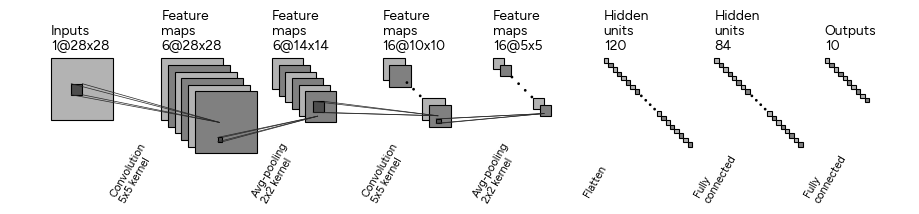

In [60]:
fc_unit_size = 2
layer_width = 50
flag_omit = True

patches = []
colors = []

plt.rcParams['font.family'] = 'Figtree'
plt.rcParams['font.weight'] =  'normal'
plt.rcParams['font.size'] = 11

# Add the custom font
font_path = '/Users/aws/Downloads/figtree-2/Figtree-Bold.ttf'
font_files = fm.findSystemFonts(fontpaths=['/Users/aws/Downloads/figtree-2'], fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
font_prop = fm.FontProperties(fname=font_path)
print(font_prop.get_name())
print(font_prop.get_family())
print(font_prop.get_weight())
plt.rcParams['font.family'] = font_prop.get_name()
fig, ax = plt.subplots()


############################
# conv layers
size_list = [(28, 28), (28, 28), (14, 14), (10, 10), (5, 5)]
num_list = [1, 6, 6, 16, 16]
x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]), size=10)

############################
# in between layers
start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
patch_size_list = [(5, 5), (2, 2), (5, 5), (2, 2)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Avg-pooling', 'Convolution', 'Avg-pooling']
xy_off_list = [[40, -65]] * len(patch_size_list)
xy_off_list[0] = [26, -65]

for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=xy_off_list[ind], rotation=60
    )


############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [120, 84, 10]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind],
                    loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]), size=10)

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-10, -65], rotation=60)

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.set_size_inches(10, 2)  # Adjust the figure size to be within allowable limits
plt.tight_layout()
plt.axis('equal')
plt.axis('off')

# plt.show()
plt.savefig('nn_lenet.pdf', format='pdf', dpi=1200, bbox_inches='tight')
# fig_dir = './'
# fig_ext = '.png'
# fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
#             bbox_inches='tight', pad_inches=0)


Figtree
['Figtree']
normal


/var/folders/0p/7fgjf7n11gs_rzpr2fwk_2_w0000gn/T/ipykernel_61099/3416175219.py:121: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


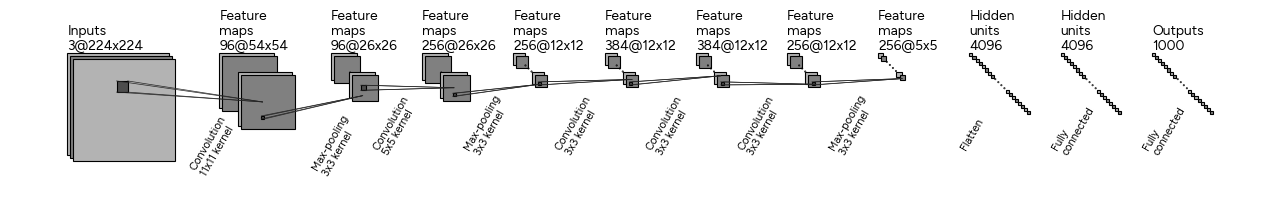

In [21]:
fc_unit_size = 3
layer_width = 90
flag_omit = True

patches = []
colors = []

plt.rcParams['font.family'] = 'Figtree'
plt.rcParams['font.weight'] =  'normal'
plt.rcParams['font.size'] = 11

# Add the custom font
font_path = '/Users/aws/Downloads/figtree-2/Figtree-Bold.ttf'
font_files = fm.findSystemFonts(fontpaths=['/Users/aws/Downloads/figtree-2'], fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
font_prop = fm.FontProperties(fname=font_path)
print(font_prop.get_name())
print(font_prop.get_family())
print(font_prop.get_weight())
plt.rcParams['font.family'] = font_prop.get_name()
fig, ax = plt.subplots()


############################
# conv layers
size_list = [(224, 224), (54, 54), (26, 26), (26, 26), (12, 12), (12, 12), (12, 12), (12, 12), (5, 5)]
num_list = [3, 96, 96, 256, 256, 384, 384, 256, 256]
x_diff_list = [0] + [layer_width] * (len(size_list) - 1)
x_diff_list[1] = 150
x_diff_list[2] = 110
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
size_list_for_plot = size_list.copy()
for ind in range(len(size_list)):
    if size_list[ind][0] > 100:
        size_list_for_plot[ind] = (int(np.log(size_list[ind][0]/100) + 100), int(np.log(size_list[ind][1]/100) + 100))

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list_for_plot[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list_for_plot[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]), size=10)

############################
# in between layers
start_ratio_list = [[0.2, 0.1], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8]]
end_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8], [0.5, 0.4], [0.3, 0.1], [0.6, 0.8], [0.5, 0.8]]
patch_size_list = [(11, 11), (3, 3), (5, 5), (3, 3), (3, 3), (3, 3), (3, 3), (3, 3)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Convolution', 'Convolution', 'Convolution', 'Max-pooling']
xy_off_list = [[40, -100]] * len(patch_size_list)
xy_off_list[0] = [120, -120]
xy_off_list[1] = [90, -120]

for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)
    label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
        patch_size_list[ind][0], patch_size_list[ind][1]), xy_off=xy_off_list[ind], rotation=60
    )


############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [4096, 4096, 1000]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind],
                    loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]), size=10)

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-10, -100], rotation=60)

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.set_size_inches(14, 2)  # Adjust the figure size to be within allowable limits
plt.tight_layout()
plt.axis('equal')
plt.axis('off')

# plt.show()
plt.savefig('nn_alexnet.pdf', format='pdf', bbox_inches='tight')
# fig_dir = './'
# fig_ext = '.png'
# fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
#             bbox_inches='tight', pad_inches=0)


Figtree
['Figtree']
normal


/var/folders/0p/7fgjf7n11gs_rzpr2fwk_2_w0000gn/T/ipykernel_61099/1820267593.py:139: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


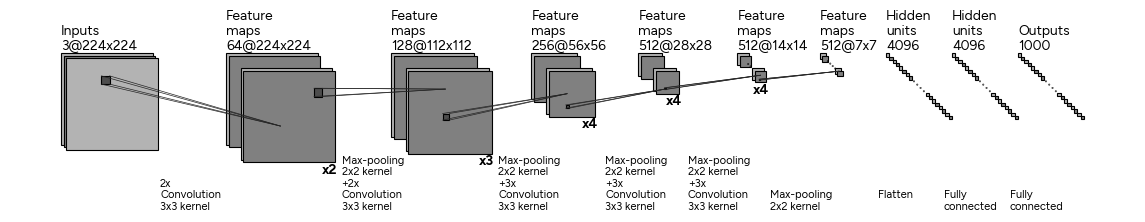

In [118]:
fc_unit_size = 4
layer_width = 80
flag_omit = True

patches = []
colors = []

plt.rcParams['font.family'] = 'Figtree'
plt.rcParams['font.weight'] =  'normal'
plt.rcParams['font.size'] = 11

# Add the custom font
font_path = '/Users/aws/Downloads/figtree-2/Figtree-Bold.ttf'
font_files = fm.findSystemFonts(fontpaths=['/Users/aws/Downloads/figtree-2'], fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
font_prop = fm.FontProperties(fname=font_path)
print(font_prop.get_name())
print(font_prop.get_family())
print(font_prop.get_weight())
plt.rcParams['font.family'] = font_prop.get_name()
fig, ax = plt.subplots()


############################
# conv layers
size_list = [(224, 224), (224, 224), (112, 112), (56, 56), (28, 28), (14, 14), (7, 7)]
num_list = [3, 64, 128, 256, 512, 512, 512]
x_diff_list = [0] + [layer_width] * (len(size_list) - 1)
x_diff_list = [0, 200, 200, 170, 130, 120, 100]
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
size_list_for_plot = size_list.copy()
for ind in range(len(size_list)):
    if size_list[ind][0] > 100:
        size_list_for_plot[ind] = (int(10 * np.log2(size_list[ind][0]/100) + 100), int(10 * np.log2(size_list[ind][1]/100) + 100))

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list_for_plot[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list_for_plot[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]), size=10)

############################
# in between layers
start_ratio_list = [[0.2, 0.1], [0.4, 0.1], [0.4, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8]]
end_ratio_list = [[0.2, 0.3], [0.4, 0.2], [0.4, 0.5], [0.4, 0.8], [0.5, 0.4], [0.3, 0.1]]
patch_size_list = [(3, 3), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]
patch_size_list_for_plot = [(10, 10), (10, 10), (8, 8), (4, 4), (2, 2), (1, 1)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['2x\nConvolution', 'Max-pooling', 'Max-pooling', 'Max-pooling', 'Max-pooling', 'Max-pooling', 'Max-pooling', 'Max-pooling']
xy_off_list = [[40, -120]] * len(patch_size_list)
xy_off_list[0] = [120, -190]
xy_off_list[1] = [140, -190]
xy_off_list[2] = [130, -190]
xy_off_list[3] = [90, -190]
xy_off_list[4] = [60, -190]
xy_off_list[5] = [40, -190]


for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list_for_plot[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)

text_list_copy = text_list.copy() 
for ind in range(len(patch_size_list)):
    text_list_copy[ind] = text_list[ind] + '\n{}x{} kernel'.format(patch_size_list[ind][0], patch_size_list[ind][1])

text_list_copy[1] += '\n+2x\nConvolution\n3x3 kernel'
text_list_copy[2] += '\n+3x\nConvolution\n3x3 kernel'
text_list_copy[3] += '\n+3x\nConvolution\n3x3 kernel'
text_list_copy[4] += '\n+3x\nConvolution\n3x3 kernel'

for ind in range(len(patch_size_list)):
    label(top_left_list[ind], text_list_copy[ind], xy_off=xy_off_list[ind])

addition_label = ['', 'x2', 'x3', 'x4', 'x4', 'x4', '']
xy_off_list = size_list_for_plot.copy()
for ind in range(len(patch_size_list) +1):
    label(top_left_list[ind], addition_label[ind], xy_off=[xy_off_list[ind][0]+5, -xy_off_list[ind][1]-35], size=10, weight='bold')

############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 3
num_list = [4096, 4096, 1000]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind],
                    loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]), size=10)

text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-10, -190], rotation=0)

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.set_size_inches(12.5, 2)  # Adjust the figure size to be within allowable limits
plt.tight_layout()
plt.axis('equal')
plt.axis('off')

# plt.show()
plt.savefig('nn_vggnet.pdf', format='pdf', bbox_inches='tight')
# fig_dir = './'
# fig_ext = '.png'
# fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
#             bbox_inches='tight', pad_inches=0)


Figtree
['Figtree']
normal


/var/folders/0p/7fgjf7n11gs_rzpr2fwk_2_w0000gn/T/ipykernel_61099/2014888575.py:140: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


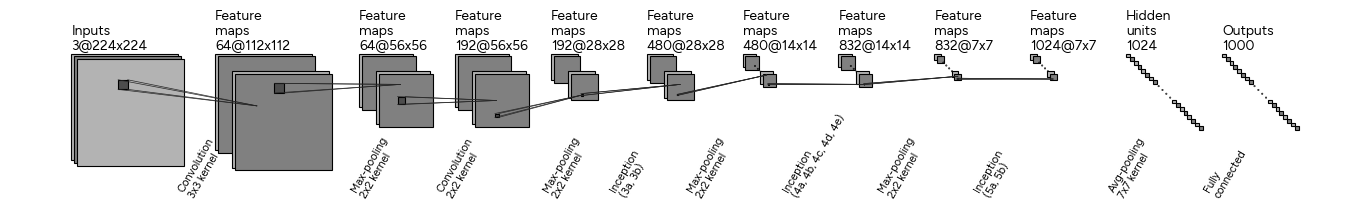

In [117]:
fc_unit_size = 4
layer_width = 100
flag_omit = True

patches = []
colors = []

plt.rcParams['font.family'] = 'Figtree'
plt.rcParams['font.weight'] =  'normal'
plt.rcParams['font.size'] = 11

# Add the custom font
font_path = '/Users/aws/Downloads/figtree-2/Figtree-Bold.ttf'
font_files = fm.findSystemFonts(fontpaths=['/Users/aws/Downloads/figtree-2'], fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
font_prop = fm.FontProperties(fname=font_path)
print(font_prop.get_name())
print(font_prop.get_family())
print(font_prop.get_weight())
plt.rcParams['font.family'] = font_prop.get_name()
fig, ax = plt.subplots()


############################
# conv layers
size_list = [(224, 224), (112, 112), (56, 56), (56, 56), (28, 28), (28, 28), (14, 14), (14, 14), (7, 7), (7, 7)]
num_list = [3, 64, 64, 192, 192, 480, 480, 832, 832, 1024]
x_diff_list = [0] + [layer_width] * (len(size_list) - 1)
# x_diff_list = [0, 200, 200, 170, 130, 120, 100]
x_diff_list[1] = 150
x_diff_list[2] = 150
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
size_list_for_plot = size_list.copy()
for ind in range(len(size_list)):
    if size_list[ind][0] > 100:
        size_list_for_plot[ind] = (int(10 * np.log2(size_list[ind][0]/100) + 100), int(10 * np.log2(size_list[ind][1]/100) + 100))

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list_for_plot[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list_for_plot[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]), size=10)

############################
# in between layers
start_ratio_list = [[0.2, 0.1], [0.4, 0.1], [0.4, 0.5], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8], [0.4, 0.8]]
end_ratio_list = [[0.2, 0.3], [0.4, 0.2], [0.4, 0.5], [0.4, 0.8], [0.5, 0.4], [0.3, 0.1], [0.4, 0.8], [0.5, 0.4], [0.4, 0.8]]
patch_size_list = [(3, 3), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2)]
patch_size_list_for_plot = [(10, 10), (10, 10), (8, 8), (4, 4), (2, 2), (1, 1), (1, 1), (1, 1), (1, 1)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Inception', 'Max-pooling', 'Inception', 'Max-pooling', 'Inception']
xy_off_list = [[40, -150]] * len(patch_size_list)
xy_off_list[0] = [110, -150]
xy_off_list[1] = [140, -150]
xy_off_list[2] = [80, -150]
xy_off_list[3] = [90, -150]
xy_off_list[4] = [60, -150]
xy_off_list[5] = [40, -150]


for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list_for_plot[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)

text_list_copy = text_list.copy() 
for ind in range(len(patch_size_list)):
    text_list_copy[ind] = text_list[ind] + '\n{}x{} kernel'.format(patch_size_list[ind][0], patch_size_list[ind][1])

text_list_copy[4] = 'Inception\n(3a, 3b)'
text_list_copy[6] = 'Inception\n(4a, 4b, 4c, 4d, 4e)'
text_list_copy[8] = 'Inception\n(5a, 5b)'

for ind in range(len(patch_size_list)):
    label(top_left_list[ind], text_list_copy[ind], xy_off=xy_off_list[ind], rotation=60)

# addition_label = ['', 'x2', 'x3', 'x4', 'x4', 'x4', '']
# xy_off_list = size_list_for_plot.copy()
# for ind in range(len(patch_size_list) +1):
#     label(top_left_list[ind], addition_label[ind], xy_off=[xy_off_list[ind][0]+5, -xy_off_list[ind][1]-35], size=10, weight='bold')

############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 2
num_list = [1024, 1000]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind],
                    loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]), size=10)

text_list = ['Avg-pooling\n7x7 kernel', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-20, -150], rotation=60)

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.set_size_inches(15, 2)  # Adjust the figure size to be within allowable limits
plt.tight_layout()
plt.axis('equal')
plt.axis('off')

# plt.show()
plt.savefig('nn_googlenet.pdf', format='pdf', bbox_inches='tight')
# fig_dir = './'
# fig_ext = '.png'
# fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
#             bbox_inches='tight', pad_inches=0)


Figtree
['Figtree']
normal


/var/folders/0p/7fgjf7n11gs_rzpr2fwk_2_w0000gn/T/ipykernel_61099/2703577739.py:140: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


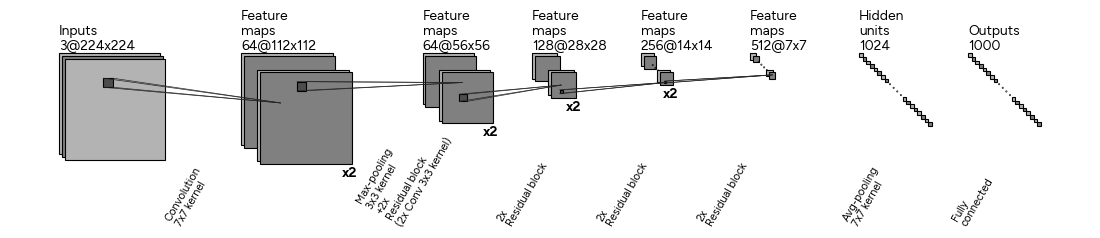

In [141]:
fc_unit_size = 4
layer_width = 120
flag_omit = True

patches = []
colors = []

plt.rcParams['font.family'] = 'Figtree'
plt.rcParams['font.weight'] =  'normal'
plt.rcParams['font.size'] = 11

# Add the custom font
font_path = '/Users/aws/Downloads/figtree-2/Figtree-Bold.ttf'
font_files = fm.findSystemFonts(fontpaths=['/Users/aws/Downloads/figtree-2'], fontext='ttf')
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    
font_prop = fm.FontProperties(fname=font_path)
print(font_prop.get_name())
print(font_prop.get_family())
print(font_prop.get_weight())
plt.rcParams['font.family'] = font_prop.get_name()
fig, ax = plt.subplots()


############################
# conv layers
size_list = [(224, 224), (112, 112), (56, 56), (28, 28), (14, 14), (7, 7)]
num_list = [3, 64, 64, 128, 256, 512]
x_diff_list = [0] + [layer_width] * (len(size_list) - 1)
# x_diff_list = [0, 200, 200, 170, 130, 120, 100]
x_diff_list[1] = 200
x_diff_list[2] = 200
text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
loc_diff_list = [[3, -3]] * len(size_list)

num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
size_list_for_plot = size_list.copy()
for ind in range(len(size_list)):
    if size_list[ind][0] > 100:
        size_list_for_plot[ind] = (int(10 * np.log2(size_list[ind][0]/100) + 100), int(10 * np.log2(size_list[ind][1]/100) + 100))

for ind in range(len(size_list)-1,-1,-1):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list_for_plot[ind],
                                num=num_list[ind],
                                num_max=NumConvMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list_for_plot[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
        num_list[ind], size_list[ind][0], size_list[ind][1]), size=10)

############################
# in between layers
start_ratio_list = [[0.2, 0.1], [0.4, 0.1], [0.4, 0.5], [0.4, 0.8], [0.4, 0.8]]
end_ratio_list = [[0.2, 0.3], [0.4, 0.2], [0.4, 0.5], [0.4, 0.8], [0.5, 0.4]]
patch_size_list = [(7, 7), (3, 3), (2, 2), (2, 2), (2, 2)]
patch_size_list_for_plot = [(10, 10), (10, 10), (8, 8), (4, 4), (2, 2)]
ind_bgn_list = range(len(patch_size_list))
text_list = ['Convolution', 'Max-pooling', '', '', '']
xy_off_list = [[40, -150]] * len(patch_size_list)
xy_off_list[0] = [115, -190]
xy_off_list[1] = [125, -190]
xy_off_list[2] = [80, -190]
xy_off_list[3] = [70, -190]
xy_off_list[4] = [60, -190]


for ind in range(len(patch_size_list)):
    add_mapping(
        patches, colors, start_ratio_list[ind], end_ratio_list[ind],
        patch_size_list_for_plot[ind], ind,
        top_left_list, loc_diff_list, num_show_list, size_list)

text_list_copy = text_list.copy() 
for ind in range(len(patch_size_list)):
    text_list_copy[ind] = text_list[ind] + '\n{}x{} kernel'.format(patch_size_list[ind][0], patch_size_list[ind][1])

text_list_copy[1] += '\n+2x\nResidual block\n(2x Conv 3x3 kernel)'
text_list_copy[2] = '2x\nResidual block'
text_list_copy[3] = '2x\nResidual block'
text_list_copy[4] = '2x\nResidual block'

for ind in range(len(patch_size_list)):
    label(top_left_list[ind], text_list_copy[ind], xy_off=xy_off_list[ind], rotation=60)

addition_label = ['', 'x2', 'x2', 'x2', 'x2', '']
xy_off_list = size_list_for_plot.copy()
for ind in range(len(patch_size_list) +1):
    label(top_left_list[ind], addition_label[ind], xy_off=[xy_off_list[ind][0]+10, -xy_off_list[ind][1]-35], size=10, weight='bold')

############################
# fully connected layers
size_list = [(fc_unit_size, fc_unit_size)] * 2
num_list = [1024, 1000]
num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

for ind in range(len(size_list)):
    if flag_omit:
        add_layer_with_omission(patches, colors, size=size_list[ind],
                                num=num_list[ind],
                                num_max=NumFcMax,
                                num_dots=NumDots,
                                top_left=top_left_list[ind],
                                loc_diff=loc_diff_list[ind])
    else:
        add_layer(patches, colors, size=size_list[ind],
                    num=num_show_list[ind],
                    top_left=top_left_list[ind],
                    loc_diff=loc_diff_list[ind])
    label(top_left_list[ind], text_list[ind] + '\n{}'.format(
        num_list[ind]), size=10)

text_list = ['Avg-pooling\n7x7 kernel', 'Fully\nconnected']

for ind in range(len(size_list)):
    label(top_left_list[ind], text_list[ind], xy_off=[-20, -190], rotation=60)

############################
for patch, color in zip(patches, colors):
    patch.set_color(color * np.ones(3))
    if isinstance(patch, Line2D):
        ax.add_line(patch)
    else:
        patch.set_edgecolor(Black * np.ones(3))
        ax.add_patch(patch)

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
fig.set_size_inches(12, 2)  # Adjust the figure size to be within allowable limits
plt.tight_layout()
plt.axis('equal')
plt.axis('off')

# plt.show()
plt.savefig('nn_resnet.pdf', format='pdf', bbox_inches='tight')
# fig_dir = './'
# fig_ext = '.png'
# fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
#             bbox_inches='tight', pad_inches=0)
